Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


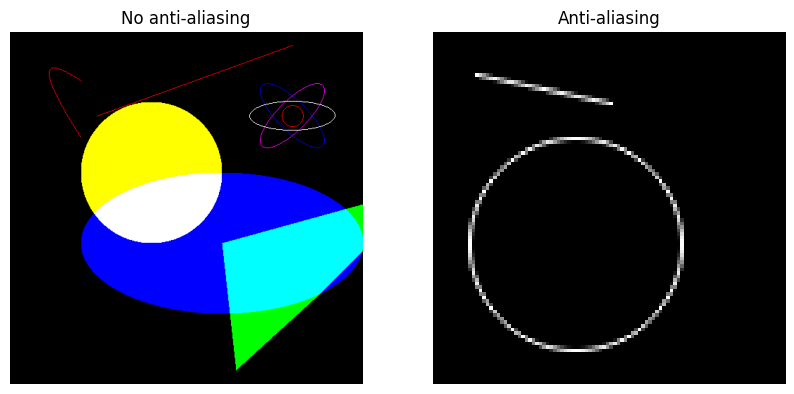

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

from skimage.draw import (
    line,
    polygon,
    disk,
    circle_perimeter,
    ellipse,
    ellipse_perimeter,
    bezier_curve,
)


fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(10, 6))


img = np.zeros((500, 500, 3), dtype=np.double)

# draw line
rr, cc = line(120, 123, 20, 400)
img[rr, cc, 0] = 255

# fill polygon
poly = np.array(
    (
        (300, 300),
        (480, 320),
        (380, 430),
        (220, 590),
        (300, 300),
    )
)
rr, cc = polygon(poly[:, 0], poly[:, 1], img.shape)
img[rr, cc, 1] = 1

# fill circle
rr, cc = disk((200, 200), 100, shape=img.shape)
img[rr, cc, :] = (1, 1, 0)

# fill ellipse
rr, cc = ellipse(300, 300, 100, 200, img.shape)
img[rr, cc, 2] = 1

# circle
rr, cc = circle_perimeter(120, 400, 15)
img[rr, cc, :] = (1, 0, 0)

# Bezier curve
rr, cc = bezier_curve(70, 100, 10, 10, 150, 100, 1)
img[rr, cc, :] = (1, 0, 0)

# ellipses
rr, cc = ellipse_perimeter(120, 400, 60, 20, orientation=math.pi / 4.0)
img[rr, cc, :] = (1, 0, 1)
rr, cc = ellipse_perimeter(120, 400, 60, 20, orientation=-math.pi / 4.0)
img[rr, cc, :] = (0, 0, 1)
rr, cc = ellipse_perimeter(120, 400, 60, 20, orientation=math.pi / 2.0)
img[rr, cc, :] = (1, 1, 1)

ax1.imshow(img)
ax1.set_title('No anti-aliasing')
ax1.axis('off')


from skimage.draw import line_aa, circle_perimeter_aa


img = np.zeros((100, 100), dtype=np.double)

# anti-aliased line
rr, cc, val = line_aa(12, 12, 20, 50)
img[rr, cc] = val

# anti-aliased circle
rr, cc, val = circle_perimeter_aa(60, 40, 30)
img[rr, cc] = val


ax2.imshow(img, cmap=plt.cm.gray)
ax2.set_title('Anti-aliasing')
ax2.axis('off')

plt.show()